# EDA

## Loading
### Libraries

In [15]:
# General libraries
import pandas as pd
import numpy as np
import time

# To plot
import altair as alt
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

### Data

In the next table we can find the general information of the databases:
    
|No.|Country |Level| Name |File name |Years | Source |Comments |
|:---:|:---:|:---|:---|:---|:---:|:---|:---|
|1 |Spain<br>🇪🇸|National |Most Frequent Names |names_spain.csv |2002-2019 |Instituto Nacional de Estadística |Frequency of the 100 most frequent names for the national total|
|2 |Spain<br>🇪🇸|National|All names |names_spain_average_age.csv |2019 |Instituto Nacional de Estadística |Frequency and average age for all given names that were chosen 20 or more times|
|3 |USA<br>🇺🇸|National|Popular Baby Names |names_usa.csv |1880-2019 |Social Security Agency |Frequency of all given names that were chosen 5 or more times|
|4 |Canada<br>🇨🇦|Province of British Columbia|B.C.'s Most Popular Baby Names |names_canada.csv |1920-2019 |Government of British Columbia |Frequency of all given names that were chosen 5 or more times |


In [16]:
# Parameters
my_folder = "../data/names/"

# Open files
df_sp = pd.read_csv(my_folder + 'names_spain.csv').drop(columns=['Unnamed: 0'])
df_sp_avg_age = pd.read_csv(my_folder + 'names_spain_average_age.csv').drop(columns=['Unnamed: 0'])
df_us = pd.read_csv(my_folder + 'names_usa.csv').drop(columns=['Unnamed: 0'])
df_ca = pd.read_csv(my_folder + 'names_canada.csv').drop(columns=['Unnamed: 0'])

# Add country and language
df_sp['country'] = 'spain'
df_us['country'] = 'usa'
df_ca['country'] = 'canada'

df_sp['language'] = 'spanish'
df_us['language'] = 'english'
df_ca['language'] = 'english'

In [39]:
df_sp_avg_age

,name,number,average_age,sex
0,antonio,666584,56.3,M
1,manuel,581915,55.2,M
2,jose,578937,61.5,M
3,francisco,488901,57.8,M
4,david,366782,31.2,M
...,...,...,...,...
52270,zhifang,20,38.2,F
52271,zia,20,8.9,F
52272,ziling,20,13.4,F
52273,zoila esther,20,51.3,F


## Basic Stats

In [17]:
# Merge data from Spain, USA and Canada in one total database
df_tot = pd.concat([df_sp, df_us, df_ca]).reset_index(drop=True)
df_tot.tail() 

,name,number,year,sex,country,language
2457803,zoë,10,2015,F,canada,english
2457804,zoë,12,2016,F,canada,english
2457805,zoë,9,2017,F,canada,english
2457806,zoë,8,2018,F,canada,english
2457807,zoë,11,2019,F,canada,english


In [18]:
# Columns
df_tot.columns.tolist()

['name', 'number', 'year', 'sex', 'country', 'language']

In [19]:
# Counts unique values by country database
pd.DataFrame([df_sp.nunique(), df_us.nunique(), df_ca.nunique()],
                   index=['spain', 'usa', 'canada'])

,name,number,year,sex,country,language
spain,379,1949,18,2,1,1
usa,99443,13731,140,2,1,1
canada,4340,635,100,2,1,1


In [20]:
# Stats
df_tot.describe()

,number,year
count,2.457808e+06,2.457808e+06
mean,1.475675e+02,1.975041e+03
std,1.364115e+03,3.349119e+01
min,0.000000e+00,1.880000e+03
25%,5.000000e+00,1.950000e+03
50%,9.000000e+00,1.983000e+03
75%,2.500000e+01,2.003000e+03
max,9.969000e+04,2.019000e+03


In [21]:
# Year
df_tot.groupby(['country'])[['year', 'number']].agg(['min', 'max', 'mean'])

year                    number                    
          min   max         mean    min    max         mean
country                                                    
canada   1920  2019  1969.500000      0    900     5.523115
spain    2002  2019  2009.926798    186  10370  1273.940875
usa      1880  2019  1976.266271      5  99690   178.521022

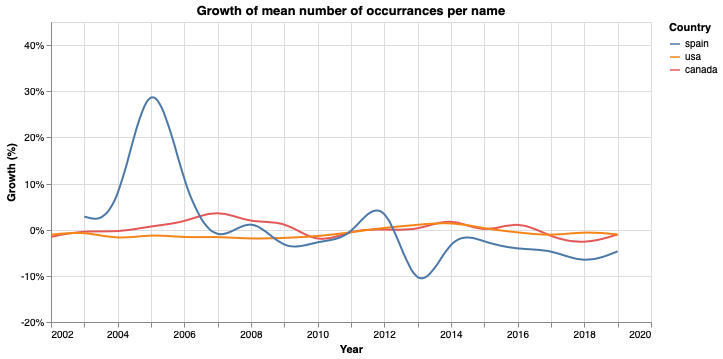

In [22]:
# Plot: Growth of mean number of occurrances per name

source = df_tot[df_tot.year>2000].groupby(['year', 'country'])[['number']]\
    .mean().reset_index().pivot(index='year', columns='country', values='number')\
    .pct_change().stack()
source = pd.DataFrame(source.reset_index().rename(columns={0:'growth'}))

base = alt.Chart(source).encode(
    alt.X('year', axis=alt.Axis(format='.0f'), title='Year'),
    alt.Y('growth', axis=alt.Axis(format='%'), title='Growth (%)'),
    alt.Color('country', title='Country', sort=['spain', 'usa', 'canada']),
    tooltip=['country', 'year', 'growth']
).properties(
    width=600, 
    title='Growth of mean number of occurrances per name'
)

line = base.mark_line(interpolate='basis')
line

While the growth in the average number of people per name is stable for the USA and Canada around 0%, it is not for Spain. However, this could be explained by the characteristics of the database wich contain only the 100 most popular names in Spain from 2002 to 2019, which means that it doesn't show the complete list of names.

## List of our favorite names

After months of searching names, we have come with a list of favorite names for our baby girl:

|Mom's choices| Dad's choices|
|:------------|:-------------|
|Macarena     |Victoria      |
|Elisa        |Gina          |
|             |Aisha         |
|             |Amanda        |
|             |Carlina       |

In [436]:
our_baby = ['Macarena', 'Elisa', 'Victoria', 'Gina', 'Aisha', 'Amanda', 'Carlina']
our_baby = pd.DataFrame([i.lower() for i in our_baby]).rename(columns={0:"name"})
our_baby

,name
0,macarena
1,elisa
2,victoria
3,gina
4,aisha
5,amanda
6,carlina


## Names in Spanish
### Frequency of the 100 most frequent names in Spain

In [48]:
# example of the database
df_sp.head()

,name,number,year,sex,country,language
0,maria,8838,2002,F,spain,spanish
1,lucia,7712,2002,F,spain,spanish
2,paula,5956,2002,F,spain,spanish
3,laura,5544,2002,F,spain,spanish
4,marta,4644,2002,F,spain,spanish


In [207]:
# Parameters
n = 5  # last `n` years

# List with names order by mean number of persons per year
df = df_sp[df_sp.year>(2019-n)].groupby(['name', 'sex'])['number'].sum().sort_values(ascending=False)
df = pd.DataFrame(df).reset_index()
order_girls = df[df.sex=='F']['name'].to_list()[:10]
order_boys = df[df.sex=='M']['name'].to_list()[:10]

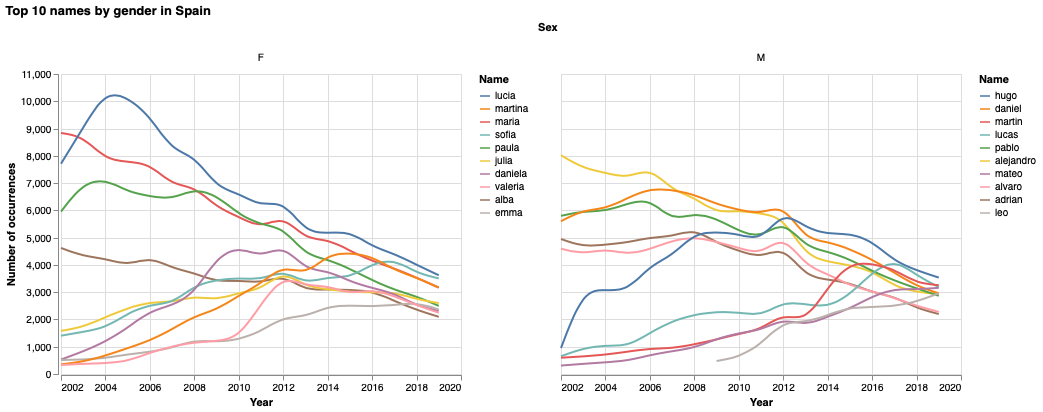

In [208]:
# Plot: Top 10 names by gender in Spain

source = df_sp[df_sp.name.isin(order_girls + order_boys)]

line = alt.Chart(source).mark_line(interpolate='basis').encode(
    alt.X("year:Q", title="Year", axis=alt.Axis(format='.0f')),
    alt.Y("number", title="Number of occurrences"),
    alt.Color("name", title="Name", sort=(order_girls+order_boys)),
    alt.Column('sex', title="Sex"),
    tooltip = ['name', 'year', 'number']
).resolve_scale(
    color='independent'
).properties(title='Top 10 names by gender in Spain')

line

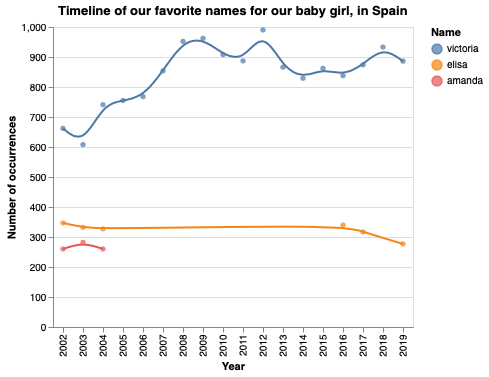

In [204]:
# Plot: Timeline of our favorite names for our baby girl, in Spain

source = df_sp[df_sp.name.isin(our_baby.name.to_list())]

base = alt.Chart(source).encode(
    alt.X("year:O", title="Year", axis=alt.Axis(format='.0f')),
    alt.Y("number", title="Number of occurrences"),
    alt.Color("name", title="Name", sort=(order_girls)),
    tooltip = ['name', 'year', 'number']
).properties(title='Timeline of our favorite names for our baby girl, in Spain')

line = base.mark_line(interpolate='basis')
point = base.mark_circle()

line + point

### Frequency and average age for all given names in Spain
List with given names that were chosen 20 or more times in 2019

In [212]:
# example of the database
df_sp_avg_age.head()

,name,number,average_age,sex
0,antonio,666584,56.3,M
1,manuel,581915,55.2,M
2,jose,578937,61.5,M
3,francisco,488901,57.8,M
4,david,366782,31.2,M


In [320]:
# Parameters
n = 5  # last `n` years

# List with names order by number of persons
order_girls = df_sp_avg_age[df_sp_avg_age.sex == 'F'].sort_values(by='number', ascending=False)[:15].name.to_list()
order_boys = df_sp_avg_age[df_sp_avg_age.sex == 'M'].sort_values(by='number', ascending=False)[:15].name.to_list()


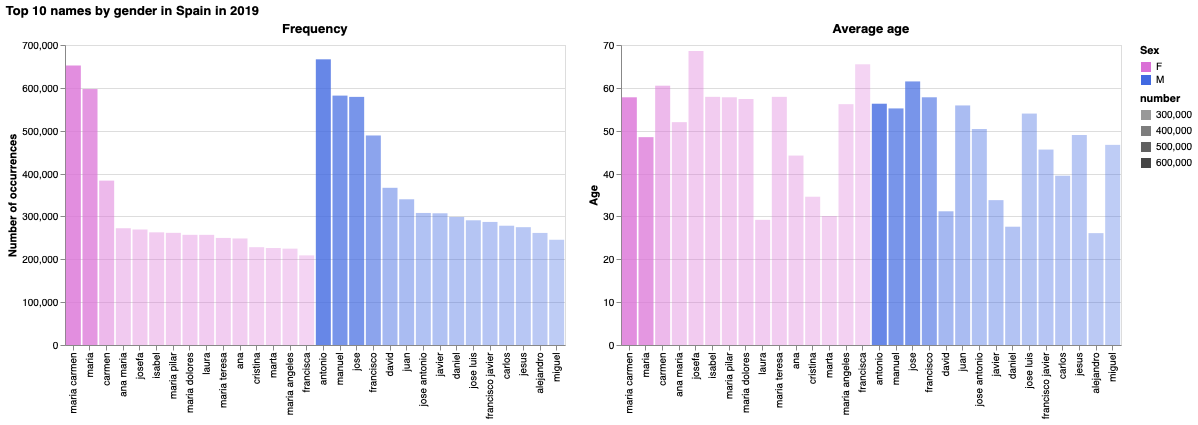

In [327]:
# Plot: Top 10 names by gender in Spain in 2019

source = pd.concat([df_sp_avg_age[df_sp_avg_age.sex=='F'][df_sp_avg_age[df_sp_avg_age.sex=='F'].name.isin(order_girls)],
                    df_sp_avg_age[df_sp_avg_age.sex=='M'][df_sp_avg_age[df_sp_avg_age.sex=='M'].name.isin(order_boys)]]).reset_index(drop=True)
domain = ['F', 'M']
my_colors = ['orchid', 'royalblue']

bars = alt.Chart(source).mark_bar().encode(
    alt.X("name", title="", sort=(order_girls+order_boys)),
    alt.Y("number", title="Number of occurrences"),
    alt.Color('sex', title="Sex", scale=alt.Scale(domain=domain, range=my_colors)),
    opacity='number:Q',
    tooltip = ['name', 'sex', 'number']
).properties(title='Frequency', width=500)

bars2 = bars.encode(
    alt.Y("average_age", title="Age"),
    tooltip = ['name', 'sex', 'average_age']
).properties(title='Average age', width=500)

(bars | bars2).properties(title='Top 10 names by gender in Spain in 2019')

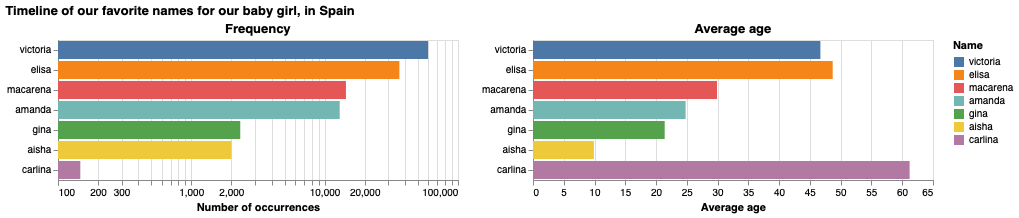

In [480]:
# Plot: Timeline of favorite names for our baby girl, in Spain

source = df_sp_avg_age[df_sp_avg_age.name.isin(our_baby.name.to_list())].sort_values(by='number', ascending=False)

def the_plots(source):
#     print(source)
    bars = alt.Chart(source).mark_bar().encode(
        alt.Y("name:O", title="", sort=source.name.to_list()),
        alt.X("number", title="Number of occurrences", scale=alt.Scale(type='log')),
        alt.Color("name", title="Name", sort=source.name.to_list()),
        tooltip = ['name', 'sex', 'number', 'average_age']
    ).properties(
        title='Frequency',
#         width = 250
    )

    bars2 = bars.encode(
        alt.X("average_age", title="Average age")
    ).properties(title='Average age')

    return (bars | bars2)
    
the_plots(source).properties(title='Timeline of our favorite names for our baby girl, in Spain')

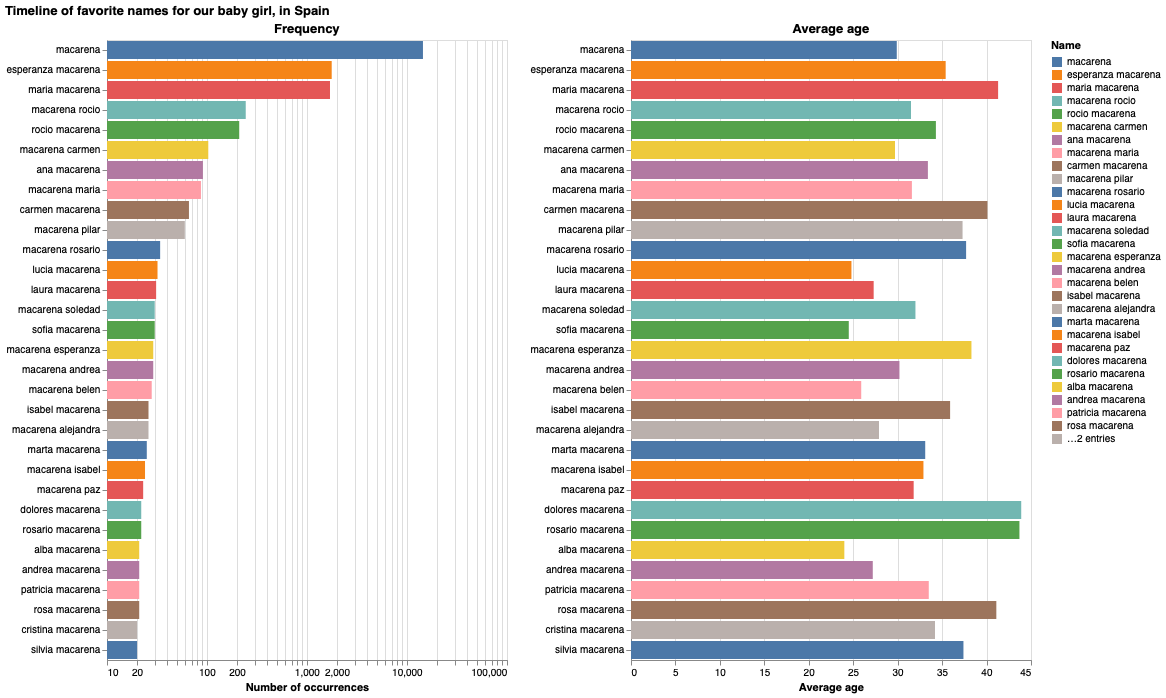

In [486]:
import re
# our_baby_dic = {'macarena': '(macarena\s+[A-Za-z]+)|([A-Za-z]+\s+macarena$)|(macarena)', 
#                 'elisa': '(elisa\s+[A-Za-z]+)|([A-Za-z]+\s+elisa$)|(elisa)', 
#                 'victoria': r'(victoria\s+[A-Za-z]+)|([A-Za-z]+\s+victoria$)|(victoria)', 
#                 'gina': r'(gina\s+[A-Za-z]+)|([A-Za-z]+\s+gina$)|(gina)', 
#                 'aisha': r'(aisha\s+[A-Za-z]+)|([A-Za-z]+\s+aisha$)|(aisha)', 
#                 'amanda': r'(amanda\s+[A-Za-z]+)|([A-Za-z]+\s+amanda$)|(amanda)', 
#                 'carlina': r'(carlina\s+[A-Za-z]+)|([A-Za-z]+\s+carlina$)|(carlina)'}


# Revision de nombre elisa y macarena
# mylist = df_sp_avg_age.name#.to_list()
# r = re.compile(r'macarena\s+[A-Za-z]+')
# newlist = filter(r.match, mylist)
# print(newlist)

# mylist = df_sp_avg_age.name
# r = re.compile(r'[A-Za-z]*\s+')
# newlist = list(filter(r.match, mylist)) # Read Note
# print(newlist)

# get names that start with macarena

newlist = dict()
for name in our_baby.name:
#     name = 'elisa'
    # our_baby_dic['macarena']
    mylist = df_sp_avg_age[df_sp_avg_age.sex=='F'].name.apply(str)
    r = re.compile(('('+name+'\s+[A-Za-z]+)|([A-Za-z]+\s+'+name+'$)|(^'+name+'$)'))
    newlist[name] = sorted(list(filter(r.match, mylist))) # Read Note

source = df_sp_avg_age[df_sp_avg_age.name.isin(newlist['macarena'])].sort_values(by='number', ascending=False)
the_plots(source).properties(title='Timeline of favorite names for our baby girl, in Spain')

# newlist['macarena']

In [417]:


# r = re.compile(r'[A-Za-z]+\s+macarena$')
# newlist2 = list(filter(r.match, mylist)) # Read Note
print(len(newlist1))

30


## USA
### Top 10 names in the USA in last 25 years

In [333]:
# Parameters
n = 40  # last `n` years

# List with names order by mean number of persons per year
df = df_us[df_us.year>=(2019-n)].groupby(['name', 'sex'])['number'].mean().sort_values(ascending=False)
df = pd.DataFrame(df).reset_index()
order_girls = df[df.sex=='F']['name'].to_list()[:10]
order_boys = df[df.sex=='M']['name'].to_list()[:10]

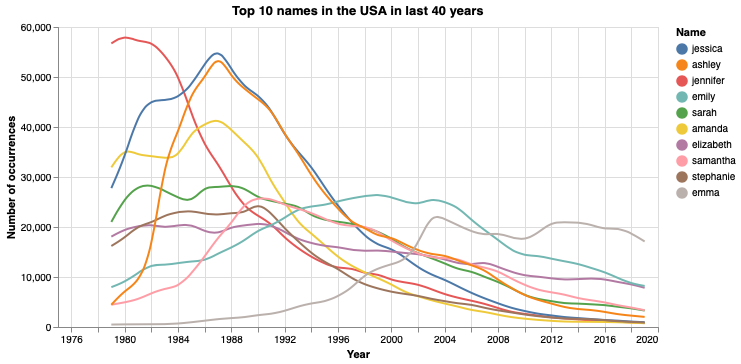

In [334]:
# Plot
source = df_us[df_us.sex=='F'][df_us[df_us.sex=='F'].name.isin(order_girls)]
source = source[source.year>=(2019-n)]#1970]

# Selection that chooses the nearest point
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['year'], empty='none')

# The basic line
line = alt.Chart(source).mark_line(interpolate='basis').encode(
    alt.X("year:Q", title="Year", axis=alt.Axis(format='.0f')),
    alt.Y("number", title="Number of occurrences"),
    alt.Color("name", title="Name", sort=order_girls),
#     tooltip = ['name', 'year', 'number']
)

# Transparent selectors across the chart.
selectors = alt.Chart(source).mark_point().encode(
    x='year:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'number:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='year:Q',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    title="Top 10 names in the USA in last "+str(n)+" years",
    width=600, height=300
)


### Favourite names for our baby girl

In [29]:
# merge original database with most repeated names
df_our_baby = pd.merge(our_baby, df_us[df_us.sex=='F'], how="inner", on=["name", "name"])
df_our_baby = df_our_baby[df_our_baby.year>=1950]

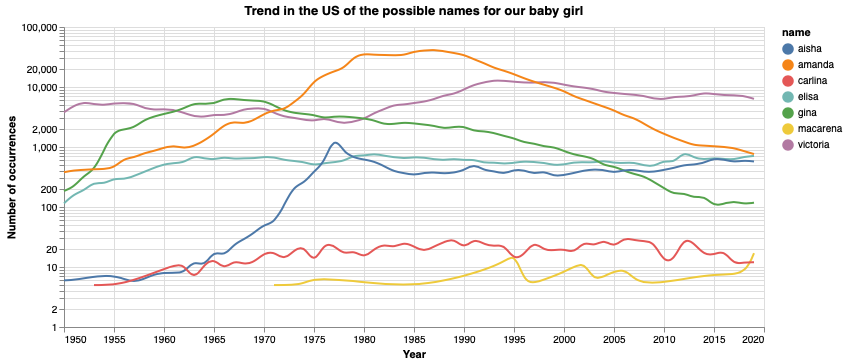

In [30]:
# Plot

# Selection that chooses the nearest point
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['year'], empty='none')

# The basic line
line = alt.Chart(df_our_baby).mark_line(interpolate='basis').encode(
    alt.X("year:Q", title="Year", axis=alt.Axis(format='.0f')),
    alt.Y("number", title="Number of occurrences", scale=alt.Scale(type='log')),
    alt.Color("name"),
#     tooltip = ['name', 'year', 'number']
).properties(
    title="Trend in the US of the possible names for our baby girl",
    width=700
)

# Transparent selectors across the chart.
selectors = alt.Chart(df_our_baby).mark_point().encode(
    x='year:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'number:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(df_our_baby).mark_rule(color='gray').encode(
    x='year:Q',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=600, height=300
)


## Canada